In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.style.use('csdh.mplstyle')

In [2]:
DATA_FILENAME = "csdh_data.csv"
DATA_FILEPATH = "/Users/callum/Uni/GitHubRepos/surviving-the-icu/datasets/drain_data/" + DATA_FILENAME

In [3]:
csdh = pd.read_csv(DATA_FILEPATH).iloc[:,1:] # drop first index column

In [4]:
csdh.tail(20)

,age,sex,hospital,diabetes,dementia,copd,stroke,ihd,arrhythmia,epilepsy,...,optype,surgeon,anaesthetic,csdhcolour,drain,drain_end,drain_entry,drain_days,timetoop_corrected,recurrence
773,93,0,9,1,1,0,0,0,0,0,...,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0
774,94,1,21,0,0,0,0,0,1,0,...,1.0,3.0,1.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0
775,94,1,5,0,0,0,1,0,0,0,...,1.0,3.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,0.0
776,94,0,5,0,1,0,0,1,0,0,...,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0
777,94,1,18,0,0,0,0,1,1,0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0
778,92,0,13,0,0,0,1,0,0,0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0
779,94,1,6,1,0,0,0,1,0,0,...,1.0,3.0,1.0,2.0,1.0,1.0,NaN,2.0,2.0,1.0
780,94,0,6,0,1,0,1,1,0,0,...,1.0,3.0,2.0,2.0,0.0,NaN,NaN,NaN,1.0,0.0
781,94,1,4,0,0,0,0,0,0,0,...,1.0,3.0,2.0,1.0,0.0,NaN,NaN,NaN,1.0,0.0
782,94,1,11,1,0,0,1,0,0,0,...,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0


In [5]:
reduced_cols = ['age', 'sex', 'hospital', 'surgeon', 'drain', 'optype']

In [6]:
viz_df = csdh.copy()[reduced_cols]

In [7]:
viz_df.tail(10)

,age,sex,hospital,surgeon,drain,optype
783,94,0,11,3.0,1.0,1.0
784,94,0,24,3.0,1.0,1.0
785,95,1,5,3.0,1.0,1.0
786,95,1,4,3.0,1.0,1.0
787,95,0,19,3.0,1.0,1.0
788,96,0,18,2.0,1.0,1.0
789,96,0,3,2.0,1.0,1.0
790,97,1,4,3.0,1.0,1.0
791,98,1,18,2.0,1.0,1.0
792,99,1,6,3.0,1.0,1.0


## DataViz begins

### Age

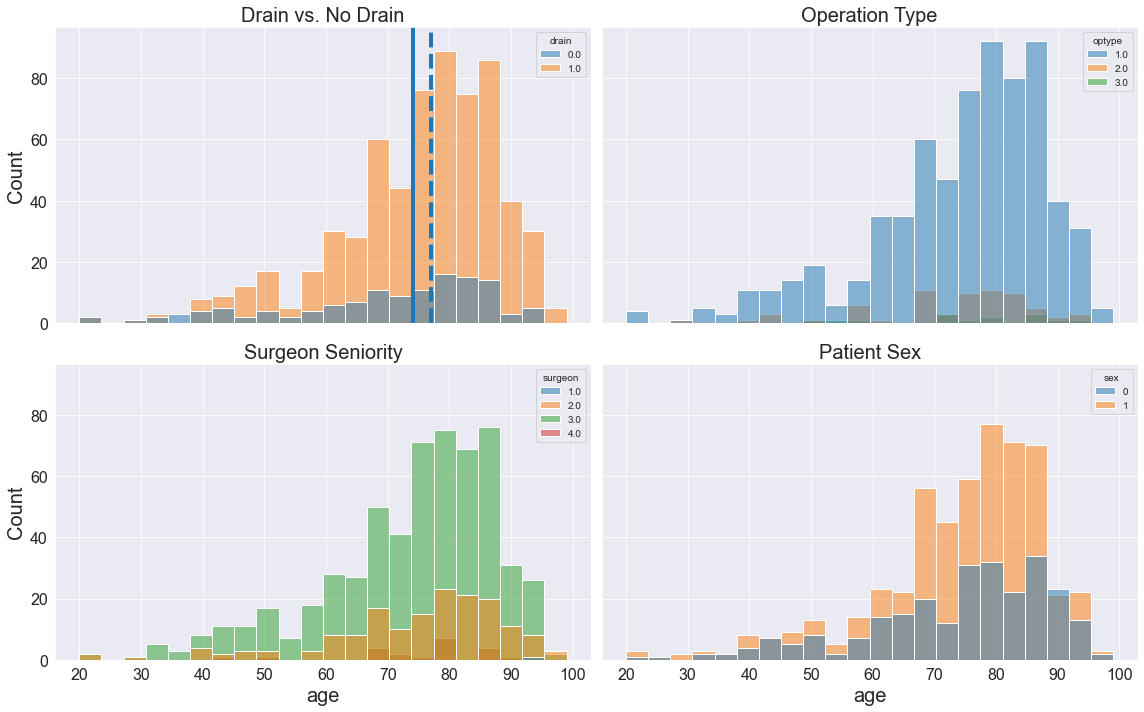

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# ax1
sns.histplot(data = viz_df, x='age', hue='drain', ax=ax1, palette='tab10')
ax1.axvline(viz_df.age.mean(), lw=4, label='mean')
ax1.axvline(viz_df.age.median(), ls='--', lw=4, label='median')
ax1.set_title('Drain vs. No Drain')

# ax2
sns.histplot(data = viz_df, x='age', hue='optype', palette='tab10', ax=ax2)
ax2.set_title('Operation Type')

# ax3
sns.histplot(data = viz_df, x='age', hue='surgeon', palette='tab10', ax=ax3)
ax3.set_title('Surgeon Seniority')

# ax4
sns.histplot(data = viz_df, x='age', hue='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

### Categorical Summary

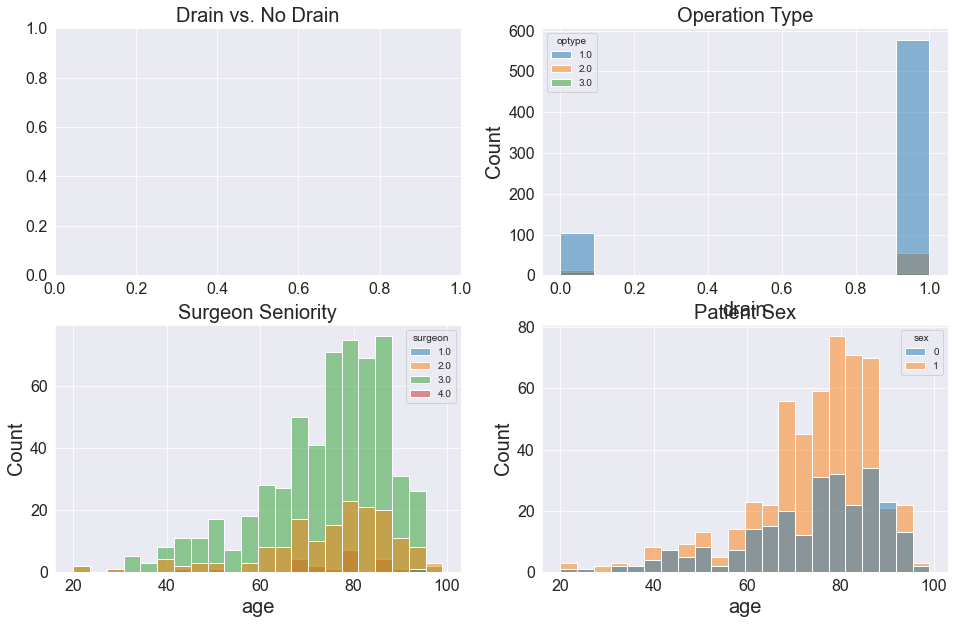

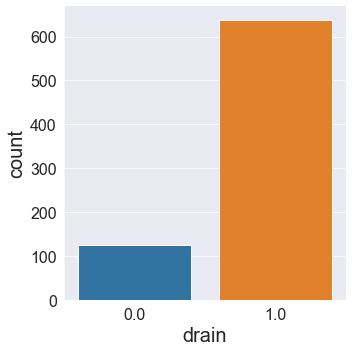

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# ax1
sns.catplot(data=viz_df, x='drain', palette='tab10', kind='count')
ax1.set_title('Drain vs. No Drain')

# ax2
sns.histplot(data = viz_df, x='drain', hue='optype', palette='tab10', ax=ax2)
ax2.set_title('Operation Type')

# ax3
sns.histplot(data = viz_df, x='age', hue='surgeon', palette='tab10', ax=ax3)
ax3.set_title('Surgeon Seniority')

# ax4
sns.histplot(data = viz_df, x='age', hue='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()